## 1.csv 파일을 불러오세 

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
import platform
if platform.system() == 'Windows': 
    matplotlib.rc('font', family='Malgun Gothic')


%matplotlib inline

df = pd.read_csv('./data/서울시공공와이파이.csv' , encoding='euc-kr')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13535 entries, 0 to 13534
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관리번호      13535 non-null  object 
 1   자치구       13535 non-null  object 
 2   와이파이명     13535 non-null  object 
 3   도로명주소     13469 non-null  object 
 4   상세주소      12101 non-null  object 
 5   설치위치(층)   4562 non-null   object 
 6   설치유형      13535 non-null  object 
 7   설치기관      13535 non-null  object 
 8   서비스구분     13535 non-null  object 
 9   망종류       13535 non-null  object 
 10  설치년도      13535 non-null  int64  
 11  실내외구분     13535 non-null  object 
 12  wifi접속환경  0 non-null      float64
 13  X좌표       13535 non-null  float64
 14  Y좌표       13535 non-null  float64
 15  작업일자      13535 non-null  object 
dtypes: float64(3), int64(1), object(12)
memory usage: 1.7+ MB


각 구별 공공데이터 설치 갯수를 파악하세요

In [9]:
df.head()

,관리번호,자치구,와이파이명,도로명주소,상세주소,설치위치(층),설치유형,설치기관,서비스구분,망종류,설치년도,실내외구분,wifi접속환경,X좌표,Y좌표,작업일자
0,ARI00001,서대문구,상수도사업본부,서대문구 서소문로 51,본관 1F,1,7-1. 커뮤니티 - 행정,서울시(AP),공공WiFi,수도사업소자가망,2014,실내,NaN,126.96675,37.561924,2021-09-06 10:57:42.0
1,ARI00002,서대문구,상수도사업본부,서대문구 서소문로 51,본관 2F,2,7-1. 커뮤니티 - 행정,서울시(AP),공공WiFi,수도사업소자가망,2014,실내,NaN,126.96675,37.561924,2021-09-06 10:57:42.0
2,ARI00003,서대문구,상수도사업본부,서대문구 서소문로 51,본관 2F,2,7-1. 커뮤니티 - 행정,서울시(AP),공공WiFi,수도사업소자가망,2014,실내,NaN,126.96675,37.561924,2021-09-06 10:57:42.0
3,ARI00004,서대문구,상수도사업본부,서대문구 서소문로 51,본관 2F,2,7-1. 커뮤니티 - 행정,서울시(AP),공공WiFi,수도사업소자가망,2014,실내,NaN,126.96675,37.561924,2021-09-06 10:57:42.0
4,ARI00005,서대문구,상수도사업본부,서대문구 서소문로 51,본관 2F,2,7-1. 커뮤니티 - 행정,서울시(AP),공공WiFi,수도사업소자가망,2014,실내,NaN,126.96675,37.561924,2021-09-06 10:57:42.0


In [11]:
wifidata = df.groupby(df['자치구']).count().관리번호
wifidata

자치구
강남구      539
강동구      433
강북구      274
강서구     1323
과천시       13
관악구      292
광진구      276
구로구      841
금천구      445
노원구      685
도봉구      584
동대문구     358
동작구      225
마포구      704
서대문구     513
서초구      582
성동구      860
성북구      247
송파구      338
양천구      616
영등포구     456
용산구      433
은평구      931
종로구      277
중구       983
중랑구      307
Name: 관리번호, dtype: int64

In [14]:
wifidict = {}

for temp in df['자치구']:
    if temp in wifidict:
        wifidict[temp] = wifidict[temp] + 1
    else :
        wifidict[temp] = 1
        
wifidict


{'서대문구': 513,
 '중구': 983,
 '성동구': 860,
 '강북구': 274,
 '양천구': 616,
 '동작구': 225,
 '강남구': 539,
 '강동구': 433,
 '광진구': 276,
 '강서구': 1323,
 '관악구': 292,
 '구로구': 841,
 '금천구': 445,
 '노원구': 685,
 '도봉구': 584,
 '동대문구': 358,
 '마포구': 704,
 '서초구': 582,
 '성북구': 247,
 '송파구': 338,
 '영등포구': 456,
 '용산구': 433,
 '은평구': 931,
 '종로구': 277,
 '중랑구': 307,
 '과천시': 13}

In [41]:
wifidata = df.value_counts(df['자치구'])
wdf = pd.DataFrame(wifidata)
wdf = wdf.rename(columns={0:'설치현황'})

<AxesSubplot:title={'center':'서울시 구별 wifi 현황'}, xlabel='자치구'>

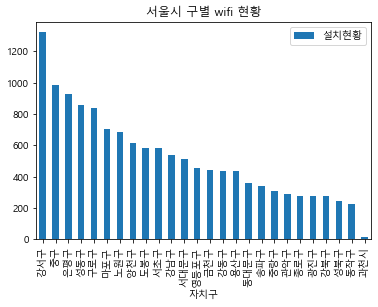

In [42]:
wdf.plot(kind='bar' , label ='구' , legend=True, title='서울시 구별 wifi 현황')

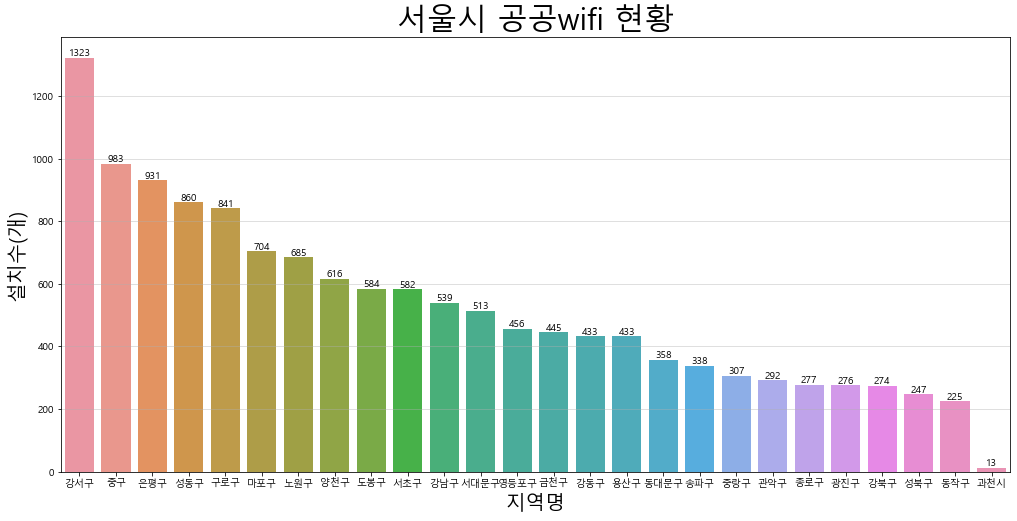

In [56]:
import seaborn as sns

plt.figure(figsize=(17,8))
bp = sns.barplot(x=wdf.index , y='설치현황' , data = wdf)
bp.set_title('서울시 공공wifi 현황', fontsize=30)
bp.set_xlabel('지역명',fontsize=20)
bp.set_ylabel('설치수(개)',fontsize=20)

for temp in bp.patches:
    bp.annotate('%d'%temp.get_height(), (temp.get_x()+temp.get_width()/2 , temp.get_height()) , ha = 'center' , va='bottom')

plt.grid(axis='y' , alpha=0.5)
plt.show()

In [44]:
wdf.index

Index(['강서구', '중구', '은평구', '성동구', '구로구', '마포구', '노원구', '양천구', '도봉구', '서초구',
       '강남구', '서대문구', '영등포구', '금천구', '강동구', '용산구', '동대문구', '송파구', '중랑구', '관악구',
       '종로구', '광진구', '강북구', '성북구', '동작구', '과천시'],
      dtype='object', name='자치구')

In [52]:
for temp in bp.patches:
    print(temp)

Rectangle(xy=(-0.4, 0), width=0.8, height=1323, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=983, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=931, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=860, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=841, angle=0)
Rectangle(xy=(4.6, 0), width=0.8, height=704, angle=0)
Rectangle(xy=(5.6, 0), width=0.8, height=685, angle=0)
Rectangle(xy=(6.6, 0), width=0.8, height=616, angle=0)
Rectangle(xy=(7.6, 0), width=0.8, height=584, angle=0)
Rectangle(xy=(8.6, 0), width=0.8, height=582, angle=0)
Rectangle(xy=(9.6, 0), width=0.8, height=539, angle=0)
Rectangle(xy=(10.6, 0), width=0.8, height=513, angle=0)
Rectangle(xy=(11.6, 0), width=0.8, height=456, angle=0)
Rectangle(xy=(12.6, 0), width=0.8, height=445, angle=0)
Rectangle(xy=(13.6, 0), width=0.8, height=433, angle=0)
Rectangle(xy=(14.6, 0), width=0.8, height=433, angle=0)
Rectangle(xy=(15.6, 0), width=0.8, height=358, angle=0)
Rectangle(xy=(16.6, 0), width=0.8, height=338, angle=0)
R

In [57]:
df.describe()

,설치년도,wifi접속환경,X좌표,Y좌표
count,13535.000000,0.0,13535.000000,13535.000000
mean,2018.292870,NaN,126.970124,37.561020
std,2.323909,NaN,0.087563,0.771491
min,2007.000000,NaN,126.795650,37.430710
25%,2017.000000,NaN,126.896386,37.516504
50%,2019.000000,NaN,126.974686,37.556220
75%,2020.000000,NaN,127.043633,37.579193
max,2021.000000,NaN,127.179900,127.101166
